<a href="https://colab.research.google.com/github/marisbotero/poesIA/blob/main/%F0%9F%92%9CStyleGAN3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#StyleGAN3

In [2]:
#@title Install dependencies
from IPython.display import clear_output

!git clone https://github.com/NVlabs/stylegan3.git
%cd stylegan3
!wget -O mini.sh https://repo.anaconda.com/miniconda/Miniconda3-py38_4.8.2-Linux-x86_64.sh
!chmod +x mini.sh
!bash ./mini.sh -b -f -p /usr/local
!conda install -q -y --prefix /usr/local jupyter
!python -m ipykernel install --name "py38" --user
!pip install click -q
!pip install numpy -q
!pip install pillow -q
!pip install torch -q
!pip install scipy -q
!pip install Ninja -q
!pip install imageio -q
!pip install imageio-ffmpeg -q
clear_output()


Loading networks from "https://api.ngc.nvidia.com/v2/models/nvidia/research/stylegan3/versions/1/files/stylegan3-r-metfacesu-1024x1024.pkl"...
Generating image for seed 4083 (0/1) ...
Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "filtered_lrelu_plugin"... Done.


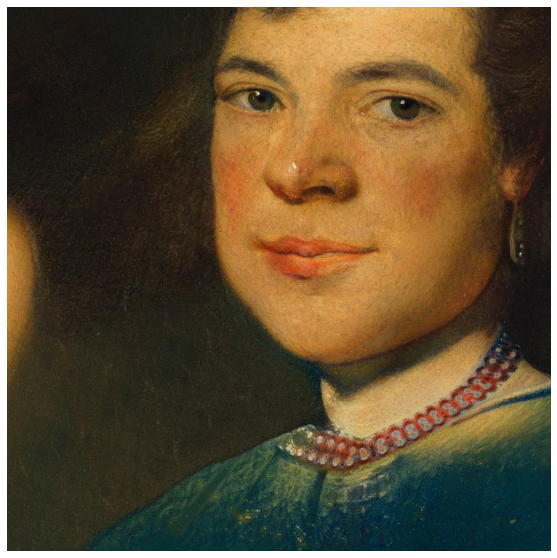

In [3]:
#@title Generate an image
#@markdown StyleGAN3 pre-trained models for config T (translation equiv.) and config R (translation and rotation equiv.)
seed = 4083 #@param {type:"slider", min:0, max:9999, step:1}

baselink ='https://api.ngc.nvidia.com/v2/models/nvidia/research/stylegan3/versions/1/files/'
model = "stylegan3-r-metfacesu-1024x1024.pkl" #@param ["stylegan3-r-afhqv2-512x512.pkl", "stylegan3-r-ffhq-1024x1024.pkl", "stylegan3-r-ffhqu-1024x1024.pkl","stylegan3-r-ffhqu-256x256.pkl","stylegan3-r-metfaces-1024x1024.pkl","stylegan3-r-metfacesu-1024x1024.pkl","stylegan3-t-afhqv2-512x512.pkl","stylegan3-t-ffhq-1024x1024.pkl","stylegan3-t-ffhqu-1024x1024.pkl","stylegan3-t-ffhqu-256x256.pkl","stylegan3-t-metfaces-1024x1024.pkl","stylegan3-t-metfacesu-1024x1024.pkl"]

# Generate an image using pre-trained AFHQv2 model ("Ours" in Figure 1, left).
!python gen_images.py --outdir=out --trunc=1 \
 --seeds=$seed --network=$baselink$model
 
import matplotlib.pyplot as plt
from PIL import Image

plt.figure(figsize=(10,10))
img = Image.open('/content/stylegan3/out/seed%04d.png' % seed);
plt.imshow(img);
plt.axis('off');

In [4]:
#@title Generate an interpolation video
%cd /content/stylegan3

start_seed = 42 #@param {type:"number"}
stop_seed = 669 #@param {type:"number"}
n_cols =  1#@param {type:"number"}
n_rows = 2 #@param {type:"number"}

#@markdown How many key frames to have?
num_keyframes = 3 #@param {type:"number"}

#@markdown How many frames for interpolation?
w_frames = 30 #@param {type:"number"}

#@markdown Total length in frames is `num_keyframes`*`w_frames`

assert stop_seed > start_seed, 'Stop_seed should be larger then start_seed'
baselink ='https://api.ngc.nvidia.com/v2/models/nvidia/research/stylegan3/versions/1/files/'
model = "stylegan3-t-afhqv2-512x512.pkl" #@param ["stylegan3-r-afhqv2-512x512.pkl", "stylegan3-r-ffhq-1024x1024.pkl", "stylegan3-r-ffhqu-1024x1024.pkl","stylegan3-r-ffhqu-256x256.pkl","stylegan3-r-metfaces-1024x1024.pkl","stylegan3-r-metfacesu-1024x1024.pkl","stylegan3-t-afhqv2-512x512.pkl","stylegan3-t-ffhq-1024x1024.pkl","stylegan3-t-ffhqu-1024x1024.pkl","stylegan3-t-ffhqu-256x256.pkl","stylegan3-t-metfaces-1024x1024.pkl","stylegan3-t-metfacesu-1024x1024.pkl"]

# Render a  grid of interpolations for seeds N through K.
!python gen_video.py --output=lerp.mp4 --trunc=1 --seeds=$start_seed-$stop_seed --grid={n_rows}x{n_cols} \
    --network=$baselink$model --num-keyframes=$num_keyframes \
    --w-frames=$w_frames


from IPython.display import HTML
from base64 import b64encode
mp4 = open('lerp.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

/content/stylegan3
Loading networks from "https://api.ngc.nvidia.com/v2/models/nvidia/research/stylegan3/versions/1/files/stylegan3-t-afhqv2-512x512.pkl"...
Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "filtered_lrelu_plugin"... Done.
100% 90/90 [01:24<00:00,  1.06it/s]
